In [75]:
import os
import numpy as np
from logger import H5Interface
import matplotlib.pyplot as plt
from policy_learning.dmps import DynamicMovementPrimitive
from policy_learning.util import quaternion
from copy import copy
# %matplotlib notebook
%matplotlib inline

In [2]:
def pose_error(p1, p2):
    pos_err = p2[:3] - p1[:3]
    rot_err = np.squeeze(quaternion.err(p2[3:], p1[3:]))
    err = np.hstack((pos_err, rot_err))
    norm_err = np.linalg.norm(err)
    return norm_err

In [3]:
h = H5Interface()
demo_data = h.get_data('trajectory_6', 'raw_data')
demo_pose_data = demo_data['x']
goal = demo_pose_data[:,-1]
new_goal = copy(goal)
new_goal[0] = 0.5
print goal
print new_goal

[  1.00150692e-01  -5.06422056e-01   9.86219398e-02   7.05399857e-01
   7.08781492e-01   1.51023813e-04  -6.30996567e-03]
[  5.00000000e-01  -5.06422056e-01   9.86219398e-02   7.05399857e-01
   7.08781492e-01   1.51023813e-04  -6.30996567e-03]


In [35]:
direct_data = h.get_data('trajectory_13', 'raw_data') # direct playback, original goal
direct_pose_data = direct_data['x'][:,11400:20400]

direct_pose_data_new_goal = direct_data['x'][:,11400:34900]

dmp_data = h.get_data('trajectory_11', 'raw_data') # DMP playback, original goal
# dmp_pose_data = dmp_data['x'][:,6600:15600]
dmp_pose_data = dmp_data['x'][:,3400:12400]

dmp_data_new_goal = h.get_data('trajectory_12', 'raw_data') # DMP playback, new goal
dmp_pose_data_new_goal = dmp_data_new_goal['x'][:,1100:-74]

In [36]:
direct_errs = []
for i in range(direct_pose_data.shape[1]):
    err = pose_error(goal, direct_pose_data[:,i])
    direct_errs.append(err)
    
dmp_errs = []
for i in range(dmp_pose_data.shape[1]):
    err = pose_error(goal, dmp_pose_data[:,i])
    dmp_errs.append(err)
    
direct_errs_new_goal = []
for i in range(direct_pose_data_new_goal.shape[1]):
    err = pose_error(new_goal, direct_pose_data_new_goal[:,i])
    direct_errs_new_goal.append(err)
    
dmp_errs_new_goal = []
for i in range(dmp_pose_data_new_goal.shape[1]):
    err = pose_error(new_goal, dmp_pose_data_new_goal[:,i])
    dmp_errs_new_goal.append(err)

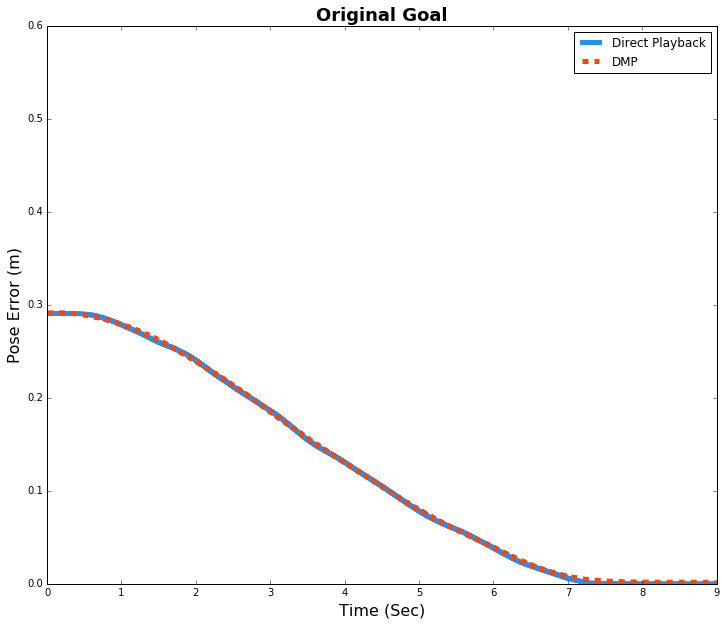

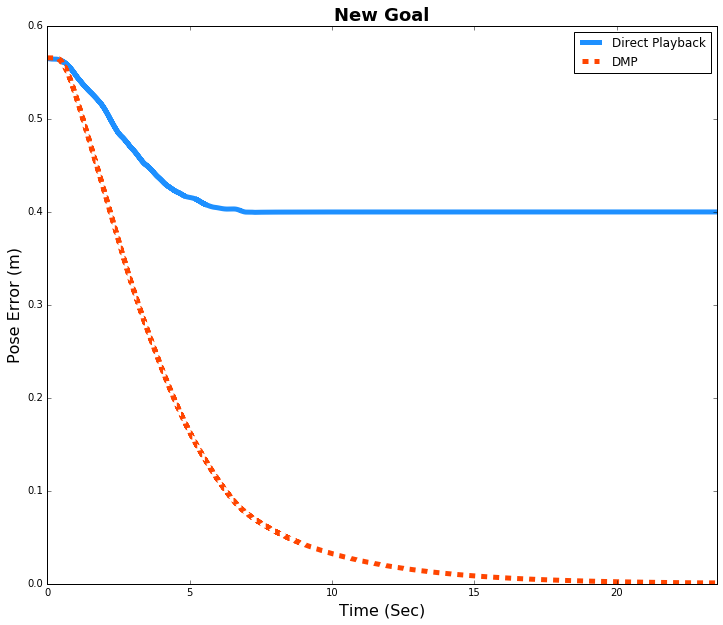

In [77]:
t1 = np.linspace(0.0, len(direct_errs) / 1000.0, len(direct_errs))
fig = plt.figure(figsize=(12,10))
plt.plot(t1, direct_errs, lw=5.0, color='dodgerblue', label='Direct Playback')
plt.plot(t1, dmp_errs, ls='--', lw=5.0, color='orangered', label='DMP')
plt.title("Original Goal", fontsize=18, fontweight='bold')
plt.xlabel("Time (Sec)", fontsize=16)
plt.ylabel("Pose Error (m)", fontsize=16)
plt.ylim(0.0, 0.6)
plt.legend()
plt.savefig(os.path.expanduser("~/Pictures/error_original_goal"))

t2 = np.linspace(0.0, len(direct_errs_new_goal) / 1000.0, len(direct_errs_new_goal))
plt.figure(figsize=(12,10))
plt.plot(t2, direct_errs_new_goal, lw=5.0, color='dodgerblue', label='Direct Playback')
plt.plot(t2, dmp_errs_new_goal, lw=5.0, ls='--', color='orangered', label='DMP')
plt.title("New Goal", fontsize=18, fontweight='bold')
plt.xlabel("Time (Sec)", fontsize=16)
plt.ylabel("Pose Error (m)", fontsize=16)
plt.xlim(0.0, len(direct_errs_new_goal) / 1000.0)
plt.ylim(0.0, 0.6)
plt.legend()
plt.savefig(os.path.expanduser("~/Pictures/error_new_goal"))
plt.show()